In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display the first few rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
# Check for missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [3]:
# Import necessary encoding libraries
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex' and 'ExerciseAngina' columns (binary categories)
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # M: 1, F: 0
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])  # Y: 1, N: 0

# One-hot encode 'ChestPainType', 'RestingECG', and 'ST_Slope' columns
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Check the changes
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


In [4]:
# Separate features (X) and target (y)
X = df.drop('HeartDisease', axis=1)  # Drop the target column
y = df['HeartDisease']  # Target column

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 15), (184, 15), (734,), (184,))

In [5]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)

accuracy, report

(0.8586956521739131,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83        77\n           1       0.89      0.87      0.88       107\n\n    accuracy                           0.86       184\n   macro avg       0.85      0.86      0.86       184\nweighted avg       0.86      0.86      0.86       184\n')

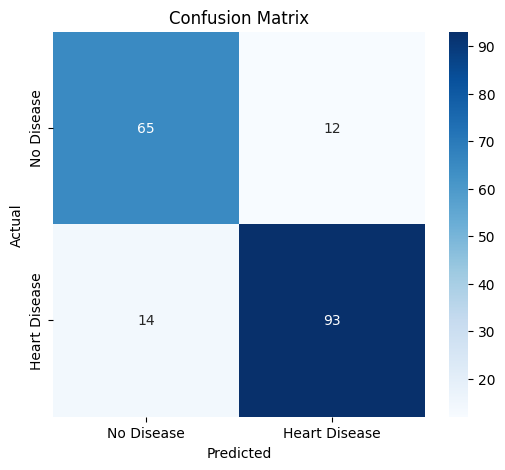

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

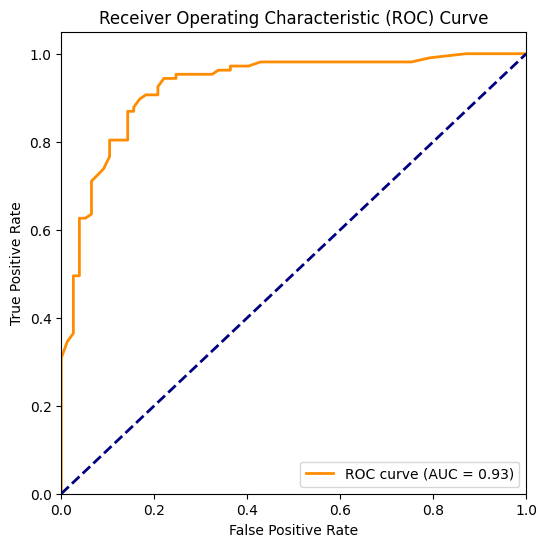

In [8]:
# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (Heart Disease)

# Calculate the False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [11]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Get the feature names from your training data
features = X_train.columns


In [12]:
# Print feature importances and their corresponding feature names
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

Age: 0.0849120921660652
Sex: 0.041378875317379056
RestingBP: 0.06795354149724192
Cholesterol: 0.10598714274834431
FastingBS: 0.0224359466592288
MaxHR: 0.10215162995760997
ExerciseAngina: 0.09191492331925309
Oldpeak: 0.11274758858028774
ChestPainType_ATA: 0.04553479726872435
ChestPainType_NAP: 0.027730402359621056
ChestPainType_TA: 0.008428416344575187
RestingECG_Normal: 0.014557205778303193
RestingECG_ST: 0.00986774213031835
ST_Slope_Flat: 0.11415653865978181
ST_Slope_Up: 0.15024315721326595


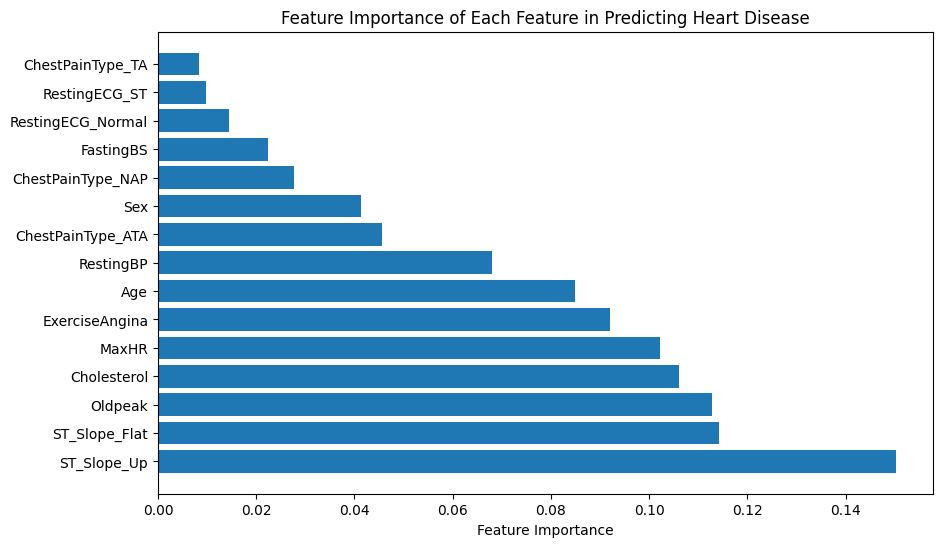

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar chart for feature importances
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]  # Sort the features by importance
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), np.array(features)[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance of Each Feature in Predicting Heart Disease")
plt.show()

In [15]:
# Example of summarizing the performance in a neat format
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)


Model Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [17]:
# First, define the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Now, proceed with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score:  0.880088100814096


In [18]:
# Predict on the test set using the best model found by GridSearchCV
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model performance on the test set
from sklearn.metrics import classification_report, accuracy_score

# Accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

# Classification report
report_best = classification_report(y_test, y_pred_best)

accuracy_best, report_best

(0.8641304347826086,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.86      0.84        77\n           1       0.89      0.87      0.88       107\n\n    accuracy                           0.86       184\n   macro avg       0.86      0.86      0.86       184\nweighted avg       0.87      0.86      0.86       184\n')

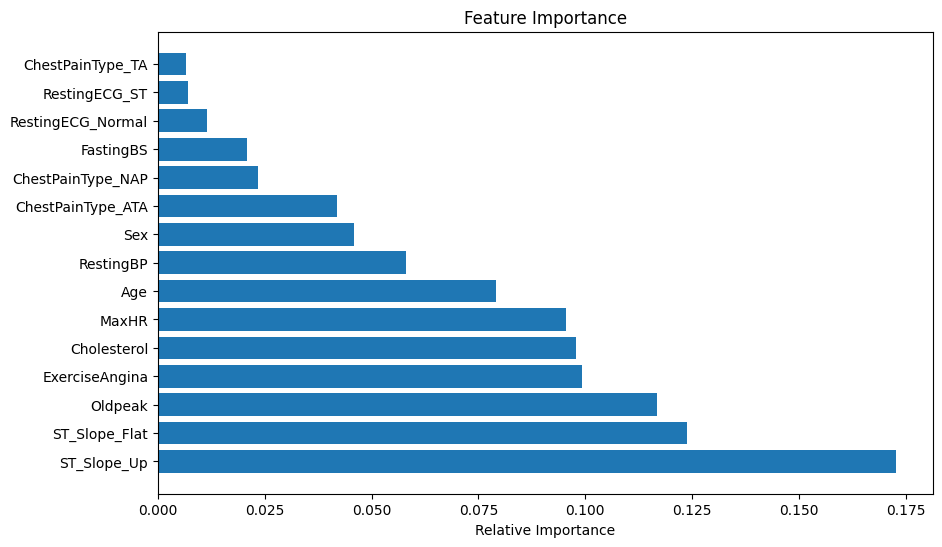

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the best model
importances = best_rf_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
summary = """
## Model Performance Summary

- **Accuracy**: 86.4%
- **Precision**: 0.82 (Class 0), 0.89 (Class 1)
- **Recall**: 0.84 (Class 0), 0.87 (Class 1)
- **F1-Score**: 0.83 (Class 0), 0.88 (Class 1)

### Confusion Matrix
- The confusion matrix shows how well the model distinguishes between heart disease and no heart disease.

### ROC Curve and AUC:
- The ROC curve indicates the model's ability to differentiate between the two classes.
"""

print(summary)


## Model Performance Summary

- **Accuracy**: 86.4%
- **Precision**: 0.82 (Class 0), 0.89 (Class 1)
- **Recall**: 0.84 (Class 0), 0.87 (Class 1)
- **F1-Score**: 0.83 (Class 0), 0.88 (Class 1)

### Confusion Matrix
- The confusion matrix shows how well the model distinguishes between heart disease and no heart disease.

### ROC Curve and AUC:
- The ROC curve indicates the model's ability to differentiate between the two classes.

